In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import timedelta

In [151]:
file_path = "C:\\Users\\samoliver.areh\\Downloads\\Forex (Policy).xlsx"
data = pd.read_excel(file_path)
returns = data['Bid Change']
returns = returns.dropna()
returns.head

<bound method NDFrame.head of 1      0.109585
2      0.363954
3      0.080006
4     -0.123798
5      0.058224
         ...   
125   -0.045358
126   -0.303306
127   -0.091075
128    0.128856
129   -0.144223
Name: Bid Change, Length: 129, dtype: float64>

Text(0, 0.5, 'Return')

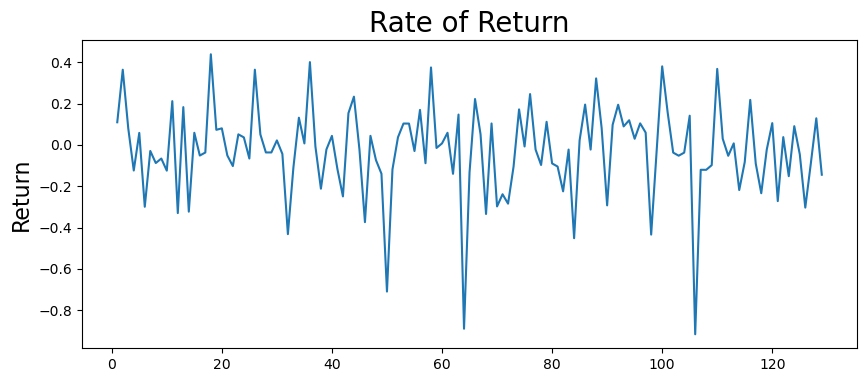

In [152]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.title('Rate of Return', fontsize=20)
plt.ylabel('Return', fontsize=16)

In [156]:
model = arch_model(returns, p=3, q=3)
model_fit = model.fit()

Iteration:      1,   Func. Count:     10,   Neg. LLF: 268.26892285266274
Iteration:      2,   Func. Count:     23,   Neg. LLF: 757.3757159446311
Iteration:      3,   Func. Count:     35,   Neg. LLF: -13.862972141495664
Iteration:      4,   Func. Count:     44,   Neg. LLF: -14.044814956709168
Iteration:      5,   Func. Count:     53,   Neg. LLF: -14.066371716890075
Iteration:      6,   Func. Count:     62,   Neg. LLF: -14.080406867740901
Iteration:      7,   Func. Count:     71,   Neg. LLF: -14.397115899250817
Iteration:      8,   Func. Count:     80,   Neg. LLF: -14.788106322410052
Iteration:      9,   Func. Count:     89,   Neg. LLF: 277.3077547959848
Iteration:     10,   Func. Count:    103,   Neg. LLF: 814.1257298675805
Iteration:     11,   Func. Count:    116,   Neg. LLF: 39607.55899579258
Iteration:     12,   Func. Count:    128,   Neg. LLF: -14.732601380560547
Iteration:     13,   Func. Count:    137,   Neg. LLF: -14.7326712118467
Iteration:     14,   Func. Count:    146,   Neg. 

C:\Users\samoliver.areh\AppData\Local\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0473. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [157]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:             Bid Change   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                14.7327
Distribution:                  Normal   AIC:                          -13.4654
Method:            Maximum Likelihood   BIC:                           9.41315
                                        No. Observations:                  129
Date:                Thu, Mar 21 2024   Df Residuals:                      128
Time:                        21:37:19   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu            -0.0233  1.779e-02     -1.312      0.189 [-5.820e-02,1.152e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      3.0978e-04  3.522e-03  8.796e-02      0.930 [-6.593e-03,7.212e-03]
alpha[1]       0.0000  2.153e-02      0.000      1.000 [-4.220e-02,4.220e-02]
alpha[2]       0.0254  2.433e-02      1.042      0.297 [-2.233e-02,7.304e-02]
alpha[3]       0.0000  1.510e-02      0.000      1.000 [-2.959e-02,2.959e-02]
beta[1]        0.0000  4.440e-02      0.000      1.000 [-8.703e-02,8.703e-02]
beta[2]        0.0000  5.278e-02      0.000      1.000      [ -0.103,  0.103]
beta[3]        0.9746  4.817e-02     20.232  5.069e-91      [  0.880,  1.069]
=============================================================================

Covariance estimator: robust
"""

In [159]:
rolling_predictions = []
test_size = 120

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=1, q=1)
    model_fit = model.fit(disp="off")
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

C:\Users\samoliver.areh\AppData\Local\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.03023. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\samoliver.areh\AppData\Local\anaconda3\Lib\site-packages\arch\univariate\base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.02861. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
C:\Users\samoliver.areh\AppData\Loca

In [160]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-120:])

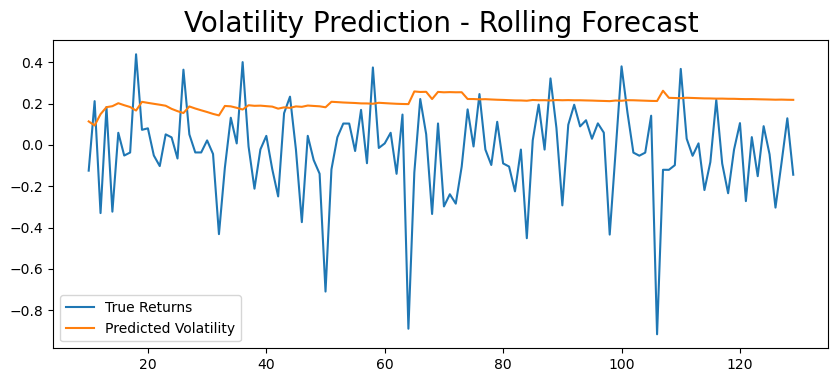

In [164]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-120:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=10)


In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [163]:
rmse = np.sqrt(mean_squared_error(returns[-120:], rolling_predictions))
mae = mean_absolute_error(returns[-120:], rolling_predictions)

print(rmse)
print(mae)

0.3254157241285407
0.2619052815583562
